# Global Income Distribution

In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
sns.set()

Optionally set chart style

In [4]:
# sns.set(style="white")
# sns.set(rc={'font.family': ['sans-serif']})
# sns.set_context("paper", rc={"font.size":10,"axes.titlesize":30,"axes.labelsize":20}) 
# sns.set(rc={'figure.figsize':(11.7,8.27),"font.size":20,"axes.titlesize":20,"axes.labelsize":20},style="white")

## Data

In [5]:
df = pd.read_csv('figure5data.csv')

In [6]:
df.head(3)

,midpoint,gdpc,a2003,a2013,c2003,c2013
0,10.0,20,0.193099,0.092346,0.193099,0.092346
1,30.0,40,0.279632,0.092270,0.472732,0.184616
2,50.0,60,0.354766,0.106717,0.827497,0.291334


In [7]:
df.tail(3)

,midpoint,gdpc,a2003,a2013,c2003,c2013
1396,850000.0,900000,5.432730e-07,1.313583e-06,99.999999,99.999998
1397,950000.0,1000000,3.014858e-07,6.997651e-07,99.999999,99.999999
1398,NaN,Above,5.097248e-07,1.042394e-06,100.000000,100.000000


Drop the last row as it includes NaN!

In [8]:
df.drop(df.tail(1).index,inplace=True)

In [9]:
df.tail(3)

,midpoint,gdpc,a2003,a2013,c2003,c2013
1395,750000.0,800000,1.046824e-06,2.630042e-06,99.999999,99.999997
1396,850000.0,900000,5.432730e-07,1.313583e-06,99.999999,99.999998
1397,950000.0,1000000,3.014858e-07,6.997651e-07,99.999999,99.999999


## Graph earners under $14,000

After 14,000 entries, the scale changes

In [10]:
subset = df.loc[df['midpoint'] < 14000]

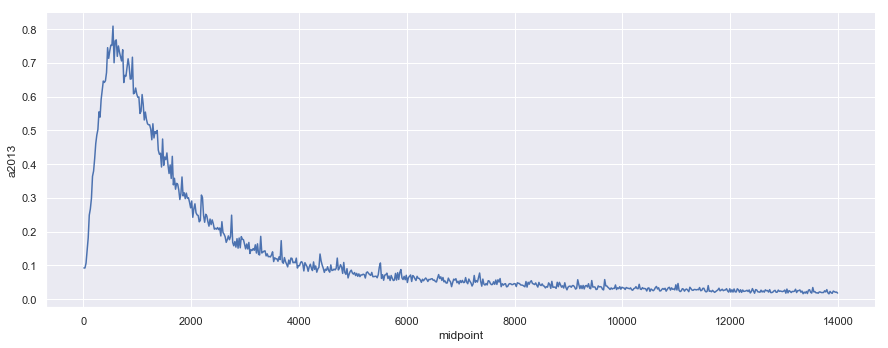

In [11]:
chart = sns.relplot(
  x="midpoint", 
  y="a2013", 
  kind="line", 
  data=subset, 
  height=5,
  aspect=10/4
)

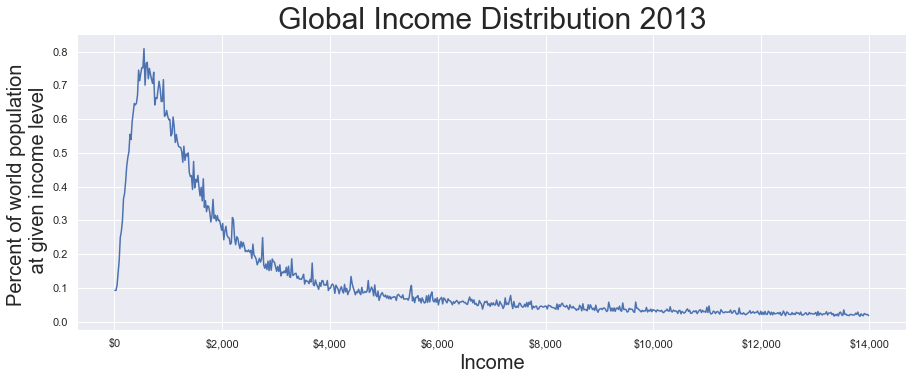

In [12]:
# chart.set(
#   xscale="linear", # can be "log"
#   xlabel='Income', 
#   ylabel='Percent of world population at given income level',
#   title='Global Income Distribution 2013',
# )

chart.axes[0][0].set_title("Global Income Distribution 2013", fontsize=30)
chart.axes[0][0].set_xlabel("Income",fontsize=20)
chart.axes[0][0].set_ylabel("Percent of world population \n at given income level",fontsize=20)

ticks = chart.axes[0][0].get_xticks()
xlabels = ['$' + '{:,.0f}'.format(x) for x in ticks]
chart.set_xticklabels(xlabels)

chart.fig

## Percentile graph

In [13]:
df.head(5)

,midpoint,gdpc,a2003,a2013,c2003,c2013
0,10.0,20,0.193099,0.092346,0.193099,0.092346
1,30.0,40,0.279632,0.092270,0.472732,0.184616
2,50.0,60,0.354766,0.106717,0.827497,0.291334
3,70.0,80,0.505162,0.143204,1.332659,0.434538
4,90.0,100,0.647129,0.181157,1.979788,0.615695


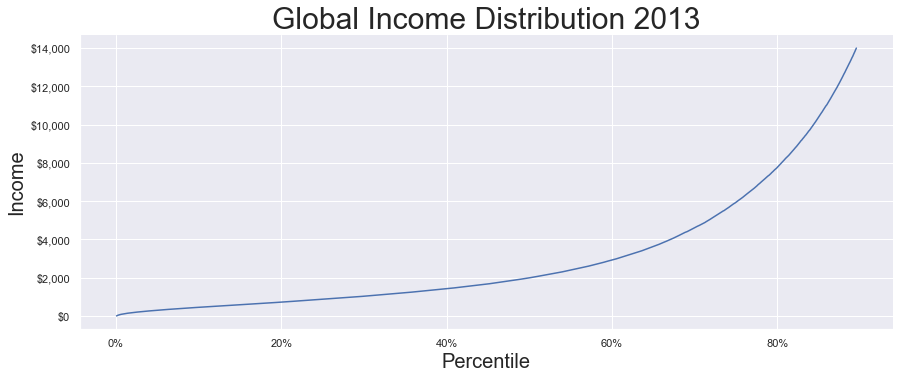

In [14]:
chart = sns.relplot(
  y="midpoint", 
  x="c2013", 
  kind="line", 
  data=subset, 
  height=5,
  aspect=10/4
)

chart.axes[0][0].set_title("Global Income Distribution 2013", fontsize=30)
chart.axes[0][0].set_xlabel("Percentile",fontsize=20)
chart.axes[0][0].set_ylabel("Income",fontsize=20)

ticks_x = chart.axes[0][0].get_xticks()
xlabels = ['{:,.0f}'.format(x) + '%' for x in ticks_x]
chart.set_xticklabels(xlabels)

ticks_y = chart.axes[0][0].get_yticks()
ylabels = ['$' + '{:,.0f}'.format(y) for y in ticks_y]
chart.set_yticklabels(ylabels)

## All 100 percentiles

### WARNING !!!

Apparently if you don't restrict this, seaborn invents and plots values up to 1,000,000 - and it seems to divide all other y values by 10 in the process. No idea why.

### BELOW GRAPH IS WRONG !!!

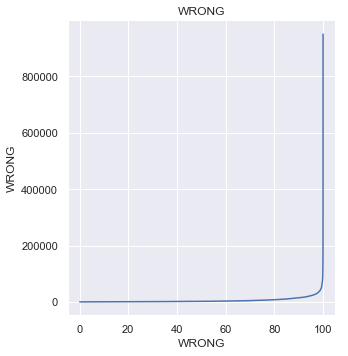

In [27]:
chart = sns.relplot(
  x="c2013", 
  y="midpoint",
  kind="line", 
  data=df,          # <----- NOTE THIS RESULTS IN AN INCORRECT GRAPH!!!
  height=5,
  aspect=1
)
chart.set(
  xlabel='WRONG', 
  ylabel='WRONG',
  title='WRONG',
)


### SO WE NEED TO MANUALLY DO THIS:

In [28]:
all_data = df.loc[df['midpoint'] < 100000]

Now we are ready to graph everything!

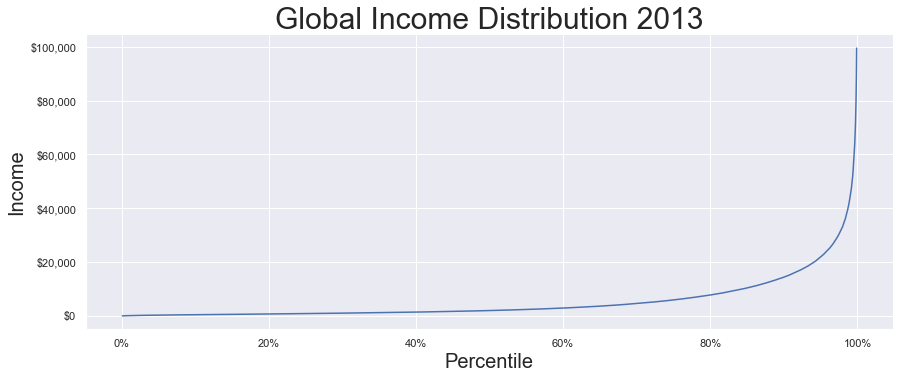

In [29]:
chart = sns.relplot(
  x="c2013", 
  y="midpoint",
  kind="line", 
  data=all_data, 
  height=5,
  aspect=10/4
)

chart.axes[0][0].set_title("Global Income Distribution 2013", fontsize=30)
chart.axes[0][0].set_xlabel("Percentile",fontsize=20)
chart.axes[0][0].set_ylabel("Income",fontsize=20)

ticks_x = chart.axes[0][0].get_xticks()
xlabels = ['{:,.0f}'.format(x) + '%' for x in ticks_x]
chart.set_xticklabels(xlabels)

ticks_y = chart.axes[0][0].get_yticks()
ylabels = ['$' + '{:,.0f}'.format(y) for y in ticks_y]
chart.set_yticklabels(ylabels)

In [30]:
import matplotlib.ticker as ticker

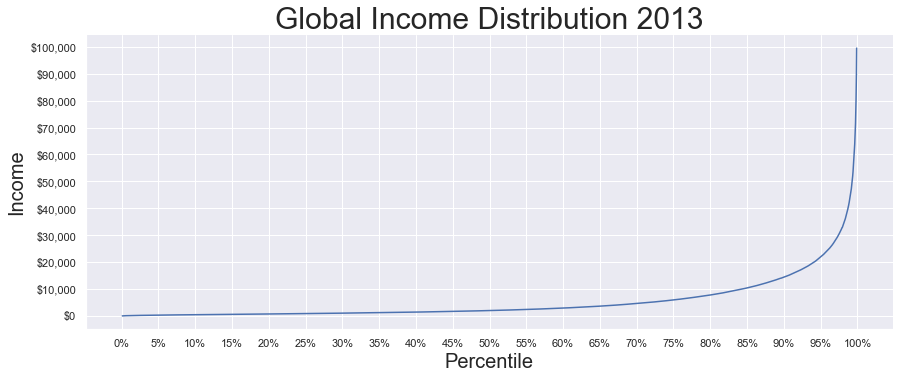

In [31]:
chart = sns.relplot(
  x="c2013", 
  y="midpoint",
  kind="line", 
  data=all_data, 
  height=5,
  aspect=10/4
)

chart.axes[0][0].yaxis.set_major_locator(ticker.MultipleLocator(10000))
chart.axes[0][0].yaxis.set_major_formatter(ticker.ScalarFormatter())

chart.axes[0][0].xaxis.set_major_locator(ticker.MultipleLocator(5))
chart.axes[0][0].xaxis.set_major_formatter(ticker.ScalarFormatter())

chart.axes[0][0].set_title("Global Income Distribution 2013", fontsize=30)
chart.axes[0][0].set_xlabel("Percentile",fontsize=20)
chart.axes[0][0].set_ylabel("Income",fontsize=20)

ticks_x = chart.axes[0][0].get_xticks()
xlabels = ['{:,.0f}'.format(x) + '%' for x in ticks_x]
chart.set_xticklabels(xlabels)

ticks_y = chart.axes[0][0].get_yticks()
ylabels = ['$' + '{:,.0f}'.format(y) for y in ticks_y]
chart.set_yticklabels(ylabels)

## Get percentile based on income

In [21]:
def get_percentile(income):
  for j in range(len(df)):
    if df['midpoint'].iloc[j] > income:
      return(df.iloc[j]['c2013'])

In [22]:
get_percentile(14350)

90.0793196448814

Find the location to confirm correct output

In [23]:
df[700:710]

,midpoint,gdpc,a2003,a2013,c2003,c2013
700,14050.0,14100,0.074961,0.110552,94.112095,89.650085
701,14150.0,14200,0.070657,0.099715,94.182753,89.749800
702,14250.0,14300,0.068242,0.100089,94.250995,89.849889
703,14350.0,14400,0.066581,0.103577,94.317575,89.953466
704,14450.0,14500,0.066530,0.125854,94.384106,90.079320
705,14550.0,14600,0.070123,0.085146,94.454229,90.164465
706,14650.0,14700,0.062350,0.099690,94.516579,90.264155
707,14750.0,14800,0.062717,0.099587,94.579296,90.363742
708,14850.0,14900,0.059377,0.085395,94.638673,90.449137
709,14950.0,15000,0.062302,0.100137,94.700975,90.549274


# STYLE IT UP!

Credit goes to https://www.dataquest.io/blog/making-538-plots/

In [33]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1290 entries, 0 to 1289
Data columns (total 6 columns):
midpoint    1290 non-null float64
gdpc        1290 non-null object
a2003       1290 non-null float64
a2013       1290 non-null float64
c2003       1290 non-null float64
c2013       1290 non-null float64
dtypes: float64(5), object(1)
memory usage: 70.5+ KB


In [34]:
import matplotlib.style as style
style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [181]:
style.use('fivethirtyeight')

Add extra number at the end for the top-right of the graph to extend higher

In [194]:
all_data.tail(3)

,midpoint,gdpc,a2003,a2013,c2003,c2013
1287,97500.0,98000,0.001069,0.002731,99.965336,99.890181
1288,98500.0,99000,0.000987,0.002654,99.966322,99.892834
1289,99500.0,100000,0.001121,0.003759,99.967444,99.896593


In [204]:
last_row = {"midpoint": 105000, "c2013": 99.9}

all_data = all_data.append(last_row, ignore_index=True)

In [205]:
all_data.tail(3)

,midpoint,gdpc,a2003,a2013,c2003,c2013
1288,98500.0,99000,0.000987,0.002654,99.966322,99.892834
1289,99500.0,100000,0.001121,0.003759,99.967444,99.896593
1290,105000.0,NaN,NaN,NaN,NaN,99.900000


Get world percentile for poverty threshold in the US: 

In [206]:
get_percentile(11490)

86.64021063473221

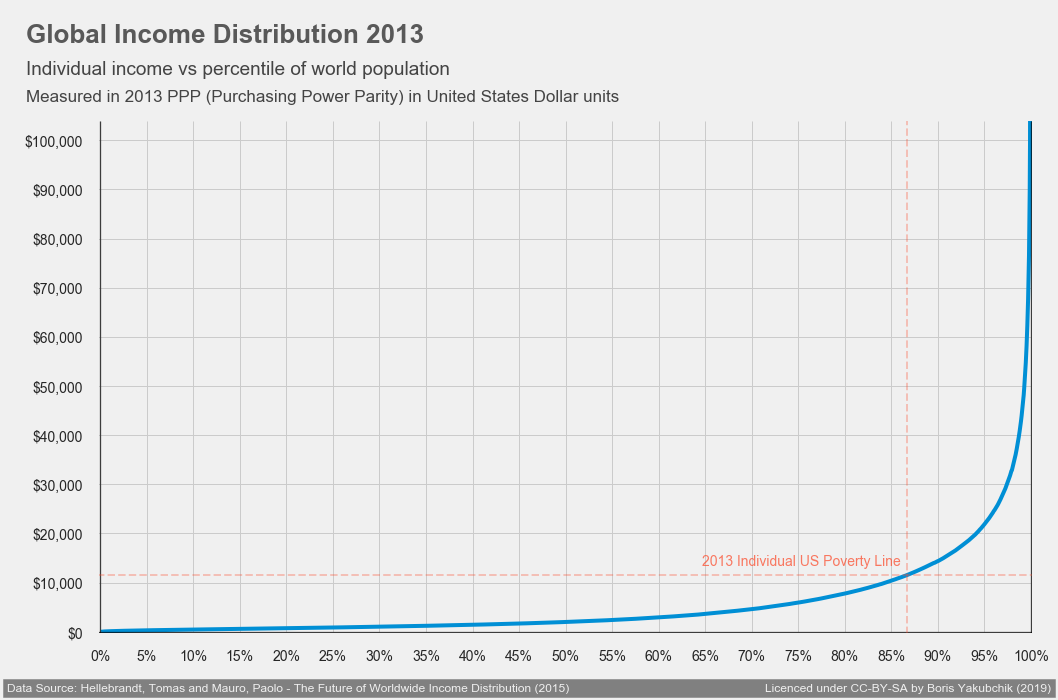

In [213]:
chart = sns.relplot(
  x="c2013", 
  y="midpoint",
  kind="line", 
  data=all_data, 
  height=8,
  aspect=16/9
)

chart.axes[0][0].yaxis.set_major_locator(ticker.MultipleLocator(10000))
chart.axes[0][0].yaxis.set_major_formatter(ticker.ScalarFormatter())

chart.axes[0][0].xaxis.set_major_locator(ticker.MultipleLocator(5))
chart.axes[0][0].xaxis.set_major_formatter(ticker.ScalarFormatter())

chart.axes[0][0].set_title("", fontsize=30)
chart.axes[0][0].set_xlabel("",fontsize=16)
chart.axes[0][0].set_ylabel("",fontsize=16)

# empty character placed above the title to give title more space above
chart.axes[0][0].text(
  x = -8, 
  y = 125000, 
  s = " ")

chart.axes[0][0].text(
  x = -8, 
  y = 120000, 
  s = "Global Income Distribution 2013",
     fontsize = 26, weight = 'bold', alpha = .75)

chart.axes[0][0].text(
  x = -8, 
  y = 113500,
  s = 'Individual income vs percentile of world population',
  fontsize = 19, alpha = .85)

chart.axes[0][0].text(
  x = -8, 
  y = 108000,
  s = 'Measured in 2013 PPP (Purchasing Power Parity) in United States Dollar units',
  fontsize = 17, alpha = .85)

ticks_x = chart.axes[0][0].get_xticks()
xlabels = ['{:,.0f}'.format(x) + '%' for x in ticks_x]
chart.set_xticklabels(xlabels)

ticks_y = chart.axes[0][0].get_yticks()
ylabels = ['$' + '{:,.0f}'.format(y) for y in ticks_y]
chart.set_yticklabels(ylabels)

chart.axes[0][0].axhline(y = 0,     color = 'black', linewidth = 1.3, alpha = .7)     # horizonal line on bottom

chart.axes[0][0].axvline(x = 0,     color = 'black', linewidth = 1.3, alpha = .7)   # vertical line on left
chart.axes[0][0].axvline(x = 100,   color = 'black', linewidth = 1.3, alpha = .7)   # vertical line on right

# poverty threshold 2013 - horizontal
chart.axes[0][0].axhline(y = 11490, linestyle='dashed', color='#fc4f30', linewidth = 2, alpha = .3) 
# poverty threshold 2013 - vertical
chart.axes[0][0].axvline(x = 86.64, linestyle='dashed', color='#fc4f30', linewidth = 2, alpha = .3) 

chart.axes[0][0].text(
  x = 64.6, 
  y = 13600, 
  s = "2013 Individual US Poverty Line",
  color = '#fc4f30',
  fontsize = 14, 
#   weight = 'bold', 
  alpha = .75)


chart.axes[0][0].tick_params(labelsize=14)

chart.axes[0][0].set_ylim(-400,104000)
chart.axes[0][0].set_xlim(-0.3, 100.1)

# SIGNATURE BAR
chart.axes[0][0].text(
    x = -10, 
    y = -12000,
    s = 'Data Source: Hellebrandt, Tomas and Mauro, Paolo - The Future of Worldwide Income Distribution (2015)                                                          Licenced under CC-BY-SA by Boris Yakubchik (2019)',
    fontsize = 12, 
    color = '#f0f0f0', 
    backgroundcolor = 'grey')

chart.axes[0][0].tick_params(axis='x', which='major', pad=15)
chart.axes[0][0].tick_params(axis='y', which='major', pad=15)

# move the chart around if you'd like
# x1,x2,y1,y2 = chart.axes[0][0].axis()
# chart.axes[0][0].axis((x1,x2,y1 + 10000 ,y2 + 10000))